# IMPORT ALL REQUIREMENTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## import data csv

In [2]:
df = pd.read_csv("./Data Color.csv")

In [3]:
df

,Date,Time,Red Freq,Green Freq,Blue Freq,Value
0,8/29/2023,21:55:55,135,160,155,2000
1,8/29/2023,21:56:08,132,157,152,2000
2,8/29/2023,21:56:14,132,156,152,2000
3,8/29/2023,21:56:21,131,155,151,2000
4,8/29/2023,21:56:27,131,155,151,2000
...,...,...,...,...,...,...
418,9/4/2023,20:40:47,117,205,175,100000
419,9/4/2023,20:40:58,124,180,157,100000
420,9/4/2023,20:41:05,121,164,150,100000
421,9/4/2023,20:41:18,120,160,144,100000


In [4]:
df.dtypes

Date          object
Time          object
Red Freq       int64
Green Freq     int64
Blue Freq      int64
Value          int64
dtype: object

# EDA

## Data Preprocessing and Feature Engineering

In [5]:
# drop the date time column

df = df.drop(columns=["Date", "Time"])
df.dropna(inplace=True)

In [6]:
display(df)

,Red Freq,Green Freq,Blue Freq,Value
0,135,160,155,2000
1,132,157,152,2000
2,132,156,152,2000
3,131,155,151,2000
4,131,155,151,2000
...,...,...,...,...
418,117,205,175,100000
419,124,180,157,100000
420,121,164,150,100000
421,120,160,144,100000


In [7]:
df['Value'] = df['Value'].astype(int).astype(str)

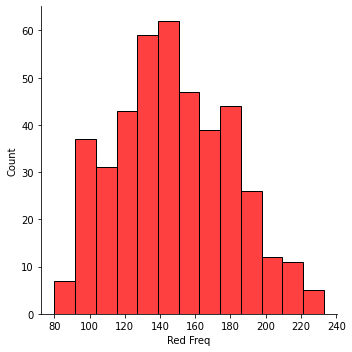

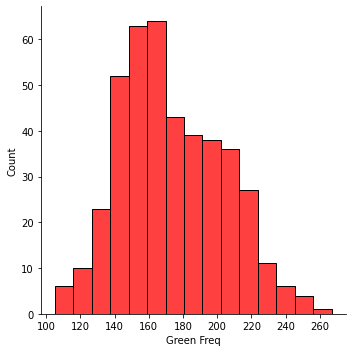

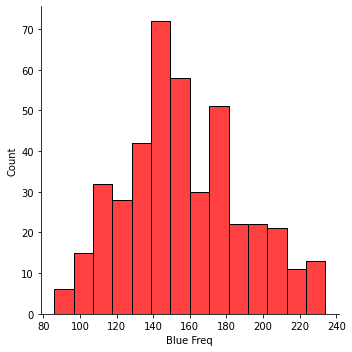

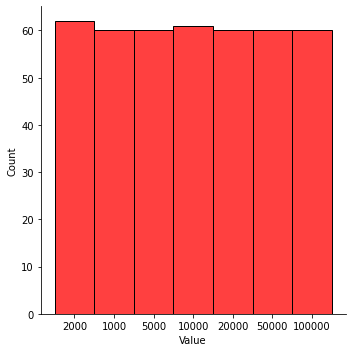

In [8]:
for i in df.columns:
    sns.displot(data=df[i], color="red")

In [9]:
display(df)

,Red Freq,Green Freq,Blue Freq,Value
0,135,160,155,2000
1,132,157,152,2000
2,132,156,152,2000
3,131,155,151,2000
4,131,155,151,2000
...,...,...,...,...
418,117,205,175,100000
419,124,180,157,100000
420,121,164,150,100000
421,120,160,144,100000


In [10]:
## scaling dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
# memex = MinMaxScaler()
# col = ["Red Freq", "Blue Freq", "Green Freq"]
# df[col] = memex.fit_transform(df[col])
# display(df)

## Feature Engineering

setelah melihat pola pada nilai frekuensi r,g, dan b. ditemukan kemiripan untuk selisih r-g, r-b, dan g-b. maka akan dibuat feature baru pada data

In [12]:
df["r-g"] = abs(df["Red Freq"] - df["Green Freq"])
df["r-b"] = abs(df["Red Freq"] - df["Blue Freq"])
df["g-b"] = abs(df["Green Freq"] - df["Blue Freq"])
df

,Red Freq,Green Freq,Blue Freq,Value,r-g,r-b,g-b
0,135,160,155,2000,25,20,5
1,132,157,152,2000,25,20,5
2,132,156,152,2000,24,20,4
3,131,155,151,2000,24,20,4
4,131,155,151,2000,24,20,4
...,...,...,...,...,...,...,...
418,117,205,175,100000,88,58,30
419,124,180,157,100000,56,33,23
420,121,164,150,100000,43,29,14
421,120,160,144,100000,40,24,16


# Modelling

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, mean_squared_error, roc_auc_score, auc, roc_curve, recall_score, confusion_matrix




In [14]:
X = df.drop(columns="Value")
y = df["Value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
display(X_train)
display(y_train)

,Red Freq,Green Freq,Blue Freq,r-g,r-b,g-b
131,145,148,159,3,14,11
31,201,235,212,34,11,23
84,136,177,175,41,39,2
290,104,151,149,47,45,2
374,153,138,110,15,43,28
...,...,...,...,...,...,...
71,116,161,164,45,48,3
106,161,209,157,48,4,52
270,129,154,145,25,16,9
348,215,216,228,1,13,12


131    20000
31      1000
84      5000
290     5000
374    50000
       ...  
71      5000
106    10000
270     2000
348    20000
102    10000
Name: Value, Length: 338, dtype: object

In [16]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svc = SVC(kernel="linear", random_state=42)
logistic_regression = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)
models = [("Decision Tree",decision_tree), ("Random Forest", random_forest), ("SVC", svc), ("Logistic Regression", logistic_regression), ("KNN", knn) ]

### Training

In [17]:
for i in models:
    i[1].fit(X_train, y_train)

c:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Prediction

Decision Tree f1 score= 0.9525516256476008
Decision Tree accuracy = 0.9529411764705882
Decision Tree precision = 0.9529411764705882
Decision Tree recall = 0.9529411764705882
Decision Tree mse = 110541176.47058824


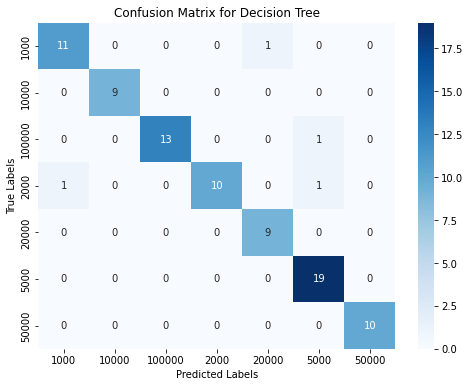

Random Forest f1 score= 0.9407226692506201
Random Forest accuracy = 0.9411764705882353
Random Forest precision = 0.9411764705882353
Random Forest recall = 0.9411764705882353
Random Forest mse = 110729411.76470588


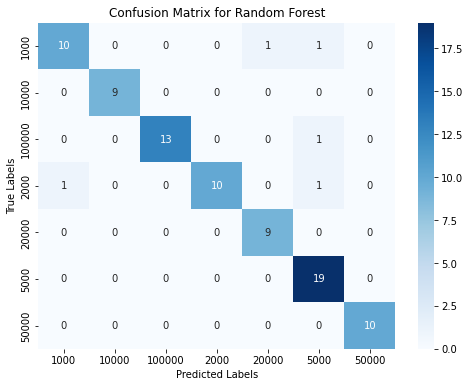

SVC f1 score= 0.9288275078147201
SVC accuracy = 0.9294117647058824
SVC precision = 0.9294117647058824
SVC recall = 0.9294117647058824
SVC mse = 212670588.2352941


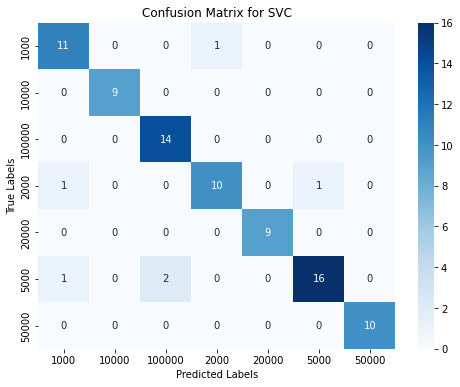

Logistic Regression f1 score= 0.8695625882431269
Logistic Regression accuracy = 0.8705882352941177
Logistic Regression precision = 0.8705882352941177
Logistic Regression recall = 0.8705882352941177
Logistic Regression mse = 432129411.7647059


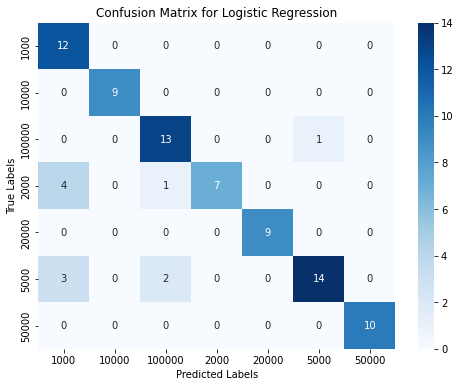

KNN f1 score= 0.927277923315075
KNN accuracy = 0.9294117647058824
KNN precision = 0.9294117647058824
KNN recall = 0.9294117647058824
KNN mse = 4670588.235294118


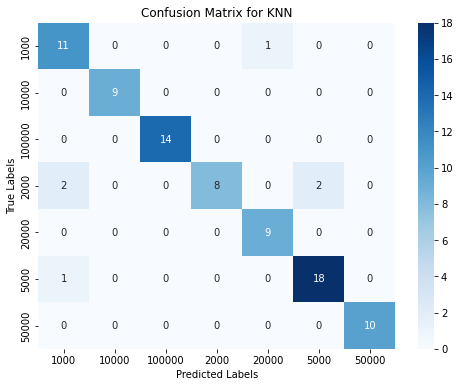

In [18]:
model_names = []
y_preds = []


for model in models:    
    y_pred = model[1].predict(X_test)

    # Calculate the confusion matrix
    # confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

    # # Print the confusion matrix
    # print(f"Confusion matrix for {model[0]}:")
    # print(confusion)

    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    mse = mean_squared_error(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='micro')
    print(f"{model[0]} f1 score= {f1}")
    print(f"{model[0]} accuracy = {accuracy}")
    print(f"{model[0]} precision = {precision}")
    print(f"{model[0]} recall = {recall}")
    print(f"{model[0]} mse = {mse}")
    confusion = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=sorted(set(y_test)))
    model_name = model[0]

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

### Analisis hasil prediksi

Dari hasil prediksi, model decision tree dan random forest memiliki akurasi tertinggi yaitu sekitar 95%

### pemilihan model setelah hasil analisis

In [19]:
# model = models[1][1]
# model = KNeighborsClassifier(n_neighbors=20)
model = RandomForestClassifier(random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

### Import model

In [20]:
import joblib
model_filename = 'model.joblib'
joblib.dump(model, model_filename)

['model.joblib']